In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from random import randint

## Create library layout

In [2]:
layout = pd.read_excel("Data/library_layout.xlsx")

In [3]:
# add proximity to windows

condition = (layout["x"]== 0.5) | (layout["x"]== 9.5) | (layout["y"]== 0.5) | (layout["y"]== 9.5)

layout["Window"] = np.where(condition, 1, 0)

In [4]:
# add wether or not a place has a computer

condition = (layout["Area"] == "D") | (layout["Area"] == "H") | (layout["Area"] == "A") | (layout["Area"] == "E")

layout["Computer"] = np.where(condition, 1, 0)

In [6]:
layout[layout["Type"]=="stairs"]

,ID,Type,x,y,z,Area,Window,Computer
237,10004,stairs,5.0,2.0,0,General,0,0
238,10005,stairs,5.0,1.0,1,General,0,0


### distances 

In [7]:
def array_xy(row):
    a = layout["x"].values[row]
    b = layout["y"].values[row]
    ar = np.array((a, b))
    return ar

In [8]:
layout["xy array"] = layout.index
layout["xy array"] = layout["xy array"].apply(array_xy)

In [9]:
def dist_toilet(row):
    """
    Calculate distance to toilets
    """
    toilet = np.array((4,0))
    dist = np.linalg.norm(row-toilet)
    return dist

In [10]:
layout["dist_toilet"] = layout["xy array"].apply(dist_toilet)

In [11]:
def dist_elevator(row):
    """
    Create distance to elevator
    """
    elevator = np.array((4,1))
    dist = np.linalg.norm(row-elevator)
    return dist

In [12]:
layout["dist_elevator"] = layout["xy array"].apply(dist_elevator)

In [13]:
def dist_stairs(row):
    """
    Create distance to stairs
    """
    if row["z"] == 0:
        stairs = np.array((5,2))
        dist = np.linalg.norm(row["xy array"]-stairs)
    else:
        stairs = np.array((5,1))
        dist = np.linalg.norm(row["xy array"]-stairs)
    return dist

In [14]:
layout["dist_stairs"] = layout.apply(dist_stairs, axis=1)

In [16]:
layout.to_pickle("layout.p")

## visualization

In [17]:
# split ground floor and first floor

layout0 = layout[layout["z"]==0]
layout1 = layout[layout["z"]==1]

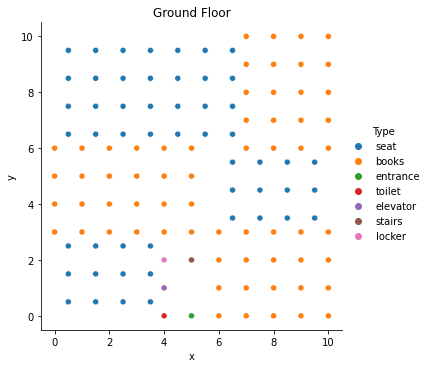

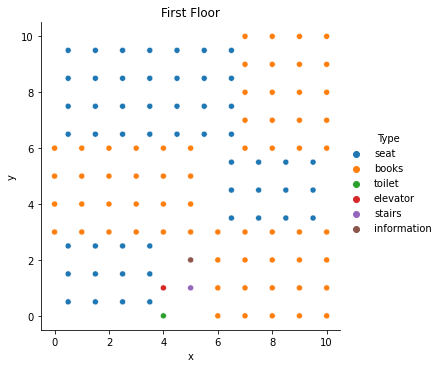

In [18]:
sn.relplot(data=layout0, x='x', y='y', hue='Type').set(title= "Ground Floor")
sn.relplot(data=layout1, x='x', y='y', hue='Type').set(title= "First Floor")
plt.show()

## Seats

In [16]:
seats = layout[layout["Type"]=="seat"]
seats.head()

,ID,Type,x,y,z,Area,Window,Computer,xy array,dist_toilet,dist_elevator,dist_stairs
0,1,seat,0.5,0.5,0,A,1,1,"[0.5, 0.5]",3.535534,3.535534,4.743416
1,2,seat,1.5,0.5,0,A,1,1,"[1.5, 0.5]",2.549510,2.549510,3.807887
2,3,seat,2.5,0.5,0,A,1,1,"[2.5, 0.5]",1.581139,1.581139,2.915476
3,4,seat,3.5,0.5,0,A,1,1,"[3.5, 0.5]",0.707107,0.707107,2.121320
4,5,seat,0.5,1.5,0,A,1,1,"[0.5, 1.5]",3.807887,3.535534,4.527693


In [17]:
seats["taken"] = 0
seats.head()

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1202/3992017600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seats["taken"] = 0


,ID,Type,x,y,z,Area,Window,Computer,xy array,dist_toilet,dist_elevator,dist_stairs,taken
0,1,seat,0.5,0.5,0,A,1,1,"[0.5, 0.5]",3.535534,3.535534,4.743416,0
1,2,seat,1.5,0.5,0,A,1,1,"[1.5, 0.5]",2.549510,2.549510,3.807887,0
2,3,seat,2.5,0.5,0,A,1,1,"[2.5, 0.5]",1.581139,1.581139,2.915476,0
3,4,seat,3.5,0.5,0,A,1,1,"[3.5, 0.5]",0.707107,0.707107,2.121320,0
4,5,seat,0.5,1.5,0,A,1,1,"[0.5, 1.5]",3.807887,3.535534,4.527693,0


In [18]:
def code(row):
    """
    give specific code to each seat
    """
    return randint(1000,9999)

In [19]:
seats['code'] = np.random.randint(1000, 9999, seats.shape[0])
seats


/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_1202/2971423623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seats['code'] = np.random.randint(1000, 9999, seats.shape[0])


,ID,Type,x,y,z,Area,Window,Computer,xy array,dist_toilet,dist_elevator,dist_stairs,taken,code
0,1,seat,0.5,0.5,0,A,1,1,"[0.5, 0.5]",3.535534,3.535534,4.743416,0,6276
1,2,seat,1.5,0.5,0,A,1,1,"[1.5, 0.5]",2.549510,2.549510,3.807887,0,8569
2,3,seat,2.5,0.5,0,A,1,1,"[2.5, 0.5]",1.581139,1.581139,2.915476,0,4636
3,4,seat,3.5,0.5,0,A,1,1,"[3.5, 0.5]",0.707107,0.707107,2.121320,0,1712
4,5,seat,0.5,1.5,0,A,1,1,"[0.5, 1.5]",3.807887,3.535534,4.527693,0,2734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,seat,5.5,8.5,1,H,0,1,"[5.5, 8.5]",8.631338,7.648529,7.516648,0,3279
100,101,seat,6.5,8.5,1,H,0,1,"[6.5, 8.5]",8.860023,7.905694,7.648529,0,3802
101,102,seat,4.5,9.5,1,H,1,1,"[4.5, 9.5]",9.513149,8.514693,8.514693,0,1618
102,103,seat,5.5,9.5,1,H,1,1,"[5.5, 9.5]",9.617692,8.631338,8.514693,0,5983


In [84]:
# save updated seats

seats.to_csv("seats.csv")

## put books in shelf

In [3]:
books = pd.read_pickle("Data/books.p")
books.head()

,authors,categories,description,format,id,image-checksum,image-path,image-url,isbn10,isbn13,lang,publication-date,title,url,text,Genre,class
0,[Disney Book Group],"[37, 46, 2784, 2942, 2980, 2912, 3385]","Part of the Art of Coloring series, which has ...",[Paperback],9781484788899,9f620cba34acf4ae6c717d0dd62c3aa4,full/8/0/0/800b21ffb4eddce9c7753889798e2affad0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1484788893,9781484788899,en,2017-05-04,Art Of Coloring: Muppets,/Art-Coloring-Muppets-Disney-Book-Group/978148...,Art Of Coloring: Muppets Part of the Art of Co...,Arts & Music,1
1,[Daniel Bettridge],"[142, 3257, 148, 3263, 334, 355, 2629, 2980, 2...","Bustling cities, ancient wonders and snow-peak...",[Paperback],9781784183721,9745d3dc171d939de76fc8c82af8f31f,full/0/5/3/05327566958b0e299eb1675a021157a0514...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1784183725,9781784183721,en,2016-11-04,A Travel Guide to the Seven Kingdoms of Westeros,/Travel-Guide-Seven-Kingdoms-Westeros-Daniel-B...,A Travel Guide to the Seven Kingdoms of Wester...,Arts & Music,3
2,"[Paul Whitehouse, Bob Mortimer]","[142, 3257, 219, 2980, 3086]",The Sunday Times bestseller,[Hardback],9781788701952,25b3f07a8c69c71ef9af6732587fc191,full/7/2/d/72d91f7d576c8c68b1dc024e0eaa75d7b67...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,178870195X,9781788701952,en,2019-05-30,Mortimer & Whitehouse: Gone Fishing,/Mortimer-Whitehouse-Gone-Fishing-Bob-Mortimer...,Mortimer & Whitehouse: Gone Fishing The Sunday...,Arts & Music,1
3,[Big Narstie],"[165, 3280, 218, 219, 2978, 2980]",Mans here to help you help yourself.,[Paperback],9781529106305,371e6d9350519cde5625ea21fde5ae42,full/d/5/8/d5816e5dbc473c0072e6a4760c4548ea75b...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1529106303,9781529106305,en,2021-04-15,How to Be Narstie,/How-Be-Narstie-Big-Narstie/9781529106305,How to Be Narstie Mans here to help you help y...,Arts & Music,1
4,[Big Narstie],"[165, 3280, 218, 219, 2978, 2980]",This book is for da real Gs and ladies.,[Hardback],9781529106299,7e99e8a7e606cb1e719480e7a7794972,full/5/3/4/534ead2a27cbd8f9d4bbd67365680c141ee...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,152910629X,9781529106299,en,2020-09-01,How to Be Narstie,/How-Be-Narstie-Big-Narstie/9781529106299,How to Be Narstie This book is for da real Gs ...,Arts & Music,1


In [4]:
def fix_authors(row):
    a = str(row).strip("[]").replace("'","")
    return a

In [5]:
books["authors"] = books["authors"].apply(fix_authors)

In [7]:
books["Genre"].value_counts()

Other                             458663
Social Science and Teaching       122931
Medicine                           44421
Engineering & Programming          43302
Arts & Music                       42760
Business, Economics & Industry     38194
Law & Crime                        30525
Kids & Fiction                     25776
Name: Genre, dtype: int64

In [8]:
# give each genre a section in library

conditions = [(books["Genre"] == "Other"), (books["Genre"] == "Social Science and Teaching"), 
        (books["Genre"] == "Medicine"), (books["Genre"] == "Engineering & Programming"), 
        (books["Genre"] == "Arts & Music"), (books["Genre"] == "Business, Economics & Industry"),
        (books["Genre"] == "Law & Crime"),(books["Genre"] == "Kids & Fiction")]

values = ["S", "W", "V", "T", "Z", "X", "U", "Y"]

books["section"] = np.select(conditions, values)


books["section"].value_counts()

S    458663
W    122931
V     44421
T     43302
Z     42760
X     38194
U     30525
Y     25776
Name: section, dtype: int64

In [9]:
shelf = pd.read_pickle("Data/shelf.p")

In [25]:
shelf = layout[layout["Type"]=="books"]
shelf["Area"].value_counts()

S    20
V    20
W    20
Z    20
T    12
U    12
X    12
Y    12
Name: Area, dtype: int64

In [10]:
def put_books(data, section):
    # filter books by the section
    sec_books = data[data['section'] == section]

    # filter shelf by the section
    sec_shelf = list(shelf[shelf["Area"]== section]['ID'].values)

    # get the class of this book section and sort it
    no_of_class = list(books[books['section'] == section]['class'].unique())
    no_of_class.sort()

    # make empty dataframe
    empty_df = pd.DataFrame(columns= sec_books.columns)
    
    # get number of shelf per class
    shelf_per_class = int(len(sec_shelf) / len(no_of_class))

    # start counter
    counter1 = 0
    counter2 = shelf_per_class


    for books_class in no_of_class:
        final = []
        # filter df by class
        class_df = sec_books[sec_books['class'] == books_class]


        # see how many books we need to put in a shelf (per class)
        book_count = np.array_split(sec_books[sec_books['class'] == books_class],shelf_per_class)

        # we want to put book count in len(shelf_per_sec)
        indx = 0
        for shelf_num in range(counter1,counter2):
            # put the shelf number * no of book in each shelf in the list
            final.extend([sec_shelf[shelf_num] for i in range(len(book_count[indx]))])
            indx += 1
        
        # put the list in new column
        class_df['shelf'] = final
        # put the df in new df
        empty_df = pd.concat([empty_df, class_df])
        
        counter1 += shelf_per_class
        counter2 += shelf_per_class
    
    
    # return the not so empty df 
    return empty_df

In [ ]:
# put books on shelf based on class, make sure that the  assignment was correct by checking mean shelf value

In [12]:
y = put_books(books, 'Y')
y

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,authors,categories,description,format,id,image-checksum,image-path,image-url,isbn10,isbn13,lang,publication-date,title,url,text,Genre,class,section,shelf
73305,"Sydney Hanson, Cottage Door Press, Tiya Hall","[2487, 2498, 2499, 2500, 2600, 2613]",Little Bear and Mommy Bear share a special day...,[Board],9781680524536,ef915af795f70a0a7f7dfcae5fac8b85,full/e/7/6/e7663a7583a22f5f79facea60165229d5cf...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1680524534,9781680524536,en,2018-10-02 00:00:00,Mommy and Me,/Mommy-Me-Tiya-Hall/9781680524536,Mommy and Me Little Bear and Mommy Bear share ...,Kids & Fiction,0,Y,1097.0
73306,"Sydney Hanson, Cottage Door Press, Tiya Hall","[2487, 2488, 2499, 2500, 2596, 2600]",Little Bear and Daddy Bear share a special day...,[Board],9781680524529,ba06a3e1b722dc1234dc7d23e11d4152,full/1/c/7/1c7cb8d9afc68336512f21faa514b6c5167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1680524526,9781680524529,en,2018-10-02 00:00:00,Daddy and Me,/Daddy-Me-Tiya-Hall/9781680524529,Daddy and Me Little Bear and Daddy Bear share ...,Kids & Fiction,0,Y,1097.0
73311,Kadir Nelson,"[2518, 2521, 2564, 2608]",The story of America and African Americans is ...,[Hardback],9780061730740,9caa6446cc65f64f1a6c7b9cc55961c5,full/f/a/c/faca164c3b6c07577724c9269c42805ccec...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,61730742,9780061730740,en,2011-10-01 00:00:00,Heart and Soul : The Story of America and Afri...,/Heart-Soul-Kadir-Nelson/9780061730740,Heart and Soul : The Story of America and Afri...,Kids & Fiction,0,Y,1097.0
73317,Helen Hancocks,"[2460, 2510, 2512, 2521, 2555, 2564, 2608, 2609]",Ella Fitzgerald sang the blues and she sang th...,[Hardback],9781847809186,1a542009623503f162091fad4389bf77,full/1/6/6/16665e6e9fd4fe37dc1c2348b9d3773cbc2...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1847809189,9781847809186,en,2018-02-06 00:00:00,Ella Queen of Jazz,/Ella-Queen-Jazz-Helen-Hancocks/9781847809186,Ella Queen of Jazz Ella Fitzgerald sang the bl...,Kids & Fiction,0,Y,1097.0
73338,Jess Redman,"[2488, 2495, 2496, 2499, 2596, 2600, 2609]",A 2021 NCTE Charlotte Huck Award Honor Book Qu...,[Hardback],9780374309763,cddf1525ed8c7e9ba85c51c096e7d7d1,full/a/d/5/ad5253241de108f304f9e38a4cd42720c4c...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,374309760,9780374309763,en,2020-07-28 00:00:00,Quintessence,/Quintessence-Jess-Redman/9780374309763,Quintessence A 2021 NCTE Charlotte Huck Award ...,Kids & Fiction,0,Y,1097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99054,Running Press,"[137, 3252, 2893, 2496]","Here is the first officially licensed ""Harry P...",[Paperback],9780762459452,bb5fd0b38f8f7431cb4aa87e9207f0be,full/3/4/d/34d0f28903325e0161a4f63a545b24d4518...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,076245945X,9780762459452,en,2016-06-30 00:00:00,Harry Potter: Collectible Quidditch Set,/Harry-Potter-Collectible-Quidditch-Set-Runnin...,Harry Potter: Collectible Quidditch Set Here i...,Kids & Fiction,4,Y,1106.0
99055,Jaime Winters,"[3036, 2543, 2564]","Shares the history of basketball, including th...",[Paperback],9780778715399,f16c700544a0a4fe9385884c64e0ffad,full/5/b/a/5bac71b34d66fb95bfd3fa810029b72fbc3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,778715396,9780778715399,en,2015-11-01 00:00:00,Center Court : The History of Basketball,/Center-Court-Jaime-Winters/9780778715399,Center Court : The History of Basketball Share...,Kids & Fiction,4,Y,1106.0
99056,"Loretta Sponsler, Kathrine Gutkovskiy","[2968, 3096, 2490, 2491, 2500, 2502]","A modern twist on Aesop's fable, The Town Mous...",[Paperback],9781951633004,866bc739d28d56b46434c2398e79afe6,full/4/f/a/4faca3f95965ed5fdd8e8e6529bb17ec6bf...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1951633008,9781951633004,en,2019-11-02 00:00:00,The Tent Mouse and The RV Mouse,/Tent-Mouse-RV-Mouse-Loretta-Sponsler/97819516...,The Tent Mouse and The RV Mouse A modern twist...,Kids & Fiction,4,Y,1106.0
99057,Nelson Yom

In [13]:
y.groupby("class").agg({"shelf":"mean"})

,shelf
class,
0,1097.500000
1,1099.499848
2,1101.400000
3,1103.500000
4,1105.500000


In [14]:
s = put_books(books, 'S')
s

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,authors,categories,description,format,id,image-checksum,image-path,image-url,isbn10,isbn13,lang,publication-date,title,url,text,Genre,class,section,shelf
181677,The Try Guys,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,[Hardback],9780008352516,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,8352518,9780008352516,en,2019-06-18 00:00:00,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,The Hidden Power of F*cking Up The Try Guys de...,Other,0,S,1001.0
181678,"Stephen Hawking, Leonard Mlodinow","[1520, 1532]",When and how did the universe begin? Why are w...,[Paperback],9780553819229,bed4d5ee9d3240303ff355e4e383cb47,full/0/a/1/0a1870d010b9ad272d5b20425b56e449eac...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,553819224,9780553819229,en,2015-03-18 00:00:00,The Grand Design,/Grand-Design-Leonard-Mlodinow/9780553819229,The Grand Design When and how did the universe...,Other,0,S,1001.0
181679,"James Harkin, John Lloyd, John Mitchinson","[377, 2978, 2980]",Did you know that: cows moo in regional accent...,[Paperback],9780571297931,d04552f52c16c90db5511e4f76e78694,full/7/5/3/753715be3dcda52b44ac9b14bce4a5258ec...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,571297935,9780571297931,en,2016-05-05 00:00:00,"1,227 QI Facts To Blow Your Socks Off",/1-227-QI-Facts-Blow-Your-Socks-Off-John-Lloyd...,"1,227 QI Facts To Blow Your Socks Off Did you ...",Other,0,S,1001.0
181681,The Muffin Brothers,"[2859, 2980, 2983]","When a young boy goes missing, a small town un...",[Hardback],9781409173359,870b29e7119cdf80beeb5aa626d019ce,full/3/a/4/3a444f0d8cb2b4ac55938ea31b5f76f151b...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1409173356,9781409173359,en,2017-10-19 00:00:00,Stranger Fillings : Edible recipes to turn you...,/Stranger-Fillings-Muffin-Brothers/9781409173359,Stranger Fillings : Edible recipes to turn you...,Other,0,S,1001.0
181682,Running Press,"[2980, 2452, 2540]",Olivia believes in making every day an adventu...,[Paperback],9780762451012,e6bf28647da12290ba99ce38cd6d3085,full/c/c/6/cc6dffe99fd691e7cc7605392ab02218185...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,762451017,9780762451012,en,2013-10-01 00:00:00,Olivia Dress Me Up : A Magnetic Kit,/Olivia-Dress-Me-Up-Running-Press/9780762451012,Olivia Dress Me Up : A Magnetic Kit Olivia bel...,Other,0,S,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640314,Garth Hattingh,[3097],"You never know when disaster will strike, so b...",[Paperback],9781497100602,635675de573cc2b377e0229c776a8b56,full/f/0/2/f029402b9a64fe29af00d939ff5d61926ba...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1497100607,9781497100602,en,2021-08-31 00:00:00,Extreme Outdoor Survival Manual : How To Survi...,/Extreme-Outdoor-Survival-Manual-Garth-Hatting...,Extreme Outdoor Survival Manual : How To Survi...,Other,3,S,1016.0
640319,Keith Odom,"[376, 2802, 3097]","This book, despite the title, is a book about ...",[Paperback],9781984554017,0687afa9aeeb6bb69fd06227b27da7c7,full/6/7/4/6742c39a58ccbbb46f0c4e7c0bc45b225ea...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1984554018,9781984554017,en,2018-09-24 00:00:00,Burn Your Safety Manual Today and Thank Me Tom...,/Burn-Your-Safety-Manual-Today-Thank-Me-Tomorr...,Burn Your Safety Manual Today and Thank Me Tom...,Other,3,S,1016.0
640320,Johnny Molloy,"[3091, 3092, 3100]",Covering 40 of the best trips the state of Vir...,[Paperback],9781469651583,e7d25e68469a8766b3fdba1f9bfb3726,full/d/d/6/dd6eb6d2c7fe702b08fdec93b596c6d43a7...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1469651580,9781469651583,en,2019-05-30 00:00:00,Backpacking Virginia : The Definitive Guide to...,/Backpacking-Virginia-Johnny-Molloy/9781469651583,Backpacking Virginia : The Definitive Guide to...,Other,3,S,1016.0
640331,"Dianne Breeze, Helen Revington, Ernest Dillon","[3055, 3056]",This guide provides detail

In [15]:
s.groupby("class").agg({"shelf":"mean"})

,shelf
class,
0,1002.499995
1,1006.499895
2,1010.485981
3,1014.499990
4,1017.000000


In [16]:
t = put_books(books, 'T')
t.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1021.499967
1,1023.461538
2,1025.500000
3,1027.500000
4,1029.500000


In [17]:
u = put_books(books, 'U')
u.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1033.5
1,1035.5
2,1037.5
3,1039.0
4,1041.5


In [18]:
v = put_books(books, 'V')
v.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1046.500000
1,1050.500000
2,1054.499921
3,1057.500000
4,1062.333333


In [19]:
w = put_books(books, 'W')
w.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1066.500000
1,1070.500000
2,1074.499903
3,1078.500000
4,1082.499966


In [20]:
x = put_books(books, 'X')
x.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1085.499029
1,1087.500000
2,1089.500000
3,1091.499931
4,1093.500000


In [21]:
z = put_books(books, 'Z')
z.groupby("class").agg({"shelf":"mean"})

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['shelf'] = final
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/3232533168.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,shelf
class,
0,1110.500000
1,1114.499943
2,1118.498979
3,1122.499893
4,1126.496614


In [22]:
# add all book genres together

books = s
books = books.append(t, ignore_index=True)
books = books.append(u, ignore_index=True)
books = books.append(v, ignore_index=True)
books = books.append(w, ignore_index=True)
books = books.append(x, ignore_index=True)
books = books.append(y, ignore_index=True)
books = books.append(z, ignore_index=True)
books

/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/701672433.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = books.append(t, ignore_index=True)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/701672433.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = books.append(u, ignore_index=True)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/701672433.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = books.append(v, ignore_index=True)
/var/folders/22/z5s1hrts7vscwhvpw0jtj1cr0000gn/T/ipykernel_2742/701672433.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = boo

,authors,categories,description,format,id,image-checksum,image-path,image-url,isbn10,isbn13,lang,publication-date,title,url,text,Genre,class,section,shelf
0,The Try Guys,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,[Hardback],9780008352516,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,8352518,9780008352516,en,2019-06-18 00:00:00,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,The Hidden Power of F*cking Up The Try Guys de...,Other,0,S,1001.0
1,"Stephen Hawking, Leonard Mlodinow","[1520, 1532]",When and how did the universe begin? Why are w...,[Paperback],9780553819229,bed4d5ee9d3240303ff355e4e383cb47,full/0/a/1/0a1870d010b9ad272d5b20425b56e449eac...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,553819224,9780553819229,en,2015-03-18 00:00:00,The Grand Design,/Grand-Design-Leonard-Mlodinow/9780553819229,The Grand Design When and how did the universe...,Other,0,S,1001.0
2,"James Harkin, John Lloyd, John Mitchinson","[377, 2978, 2980]",Did you know that: cows moo in regional accent...,[Paperback],9780571297931,d04552f52c16c90db5511e4f76e78694,full/7/5/3/753715be3dcda52b44ac9b14bce4a5258ec...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,571297935,9780571297931,en,2016-05-05 00:00:00,"1,227 QI Facts To Blow Your Socks Off",/1-227-QI-Facts-Blow-Your-Socks-Off-John-Lloyd...,"1,227 QI Facts To Blow Your Socks Off Did you ...",Other,0,S,1001.0
3,The Muffin Brothers,"[2859, 2980, 2983]","When a young boy goes missing, a small town un...",[Hardback],9781409173359,870b29e7119cdf80beeb5aa626d019ce,full/3/a/4/3a444f0d8cb2b4ac55938ea31b5f76f151b...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1409173356,9781409173359,en,2017-10-19 00:00:00,Stranger Fillings : Edible recipes to turn you...,/Stranger-Fillings-Muffin-Brothers/9781409173359,Stranger Fillings : Edible recipes to turn you...,Other,0,S,1001.0
4,Running Press,"[2980, 2452, 2540]",Olivia believes in making every day an adventu...,[Paperback],9780762451012,e6bf28647da12290ba99ce38cd6d3085,full/c/c/6/cc6dffe99fd691e7cc7605392ab02218185...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,762451017,9780762451012,en,2013-10-01 00:00:00,Olivia Dress Me Up : A Magnetic Kit,/Olivia-Dress-Me-Up-Running-Press/9780762451012,Olivia Dress Me Up : A Magnetic Kit Olivia bel...,Other,0,S,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806567,Pocket Puzzles,"[43, 46, 80, 92, 2865, 2219, 2966, 2927]",Pocket Word Search Books For AdultsPacked with...,[Paperback],9781679681431,5f333d0e3af82d5187c39e1ddcdd89e8,full/c/0/a/c0acc5b79a2b46c5dde8efb7ccf50e45486...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1679681435,9781679681431,en,2019-12-23 00:00:00,Pocket Word Search : 99 Pocket Word Search Puz...,/Pocket-Word-Search-Pocket-Puzzles/9781679681431,Pocket Word Search : 99 Pocket Word Search Puz...,Arts & Music,4,Z,1128.0
806568,Pocket Puzzles,"[43, 46, 80, 92, 2865, 2219, 2966, 2927]",Pocket Word Search Books For AdultsPacked with...,[Paperback],9781679686658,5f1c5555bc30e39c5d7457c846e05d23,full/8/9/b/89b1c0049d380cd11f749cc2d5cef801b86...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1679686658,9781679686658,en,2019-12-23 00:00:00,Pocket Word Search : 99 Pocket Word Search Puz...,/Pocket-Word-Search-Pocket-Puzzles/9781679686658,Pocket Word Search : 99 Pocket Word Search Puz...,Arts & Music,4,Z,1128.0
806569,Pocket Puzzles,"[43, 46, 80, 92, 2865, 2219, 2966, 2927]",Pocket Word Search Books For AdultsPacked with...,[Paperback],9781679676406,f5945b8af549fc6b994e2a4d13a5014c,full/2/9/8/298453c682c2d6f6d3f939bddd4ae900ea2...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,1679676407,9781679676406,en,2019-12-23 00:00:00,Pocket Word Search : 99 Pocket Word Search Puz...,/Pocket-Word-Search-Pocket-Puzzles/9781679676406,Pocket Word Search : 99 Pocket Word Search Puz...,Arts & Music,4,Z,1128.0
806570,Pocket Puzzles

In [26]:
books["id"] = books["id"].astype(int)
books["class"] = books["class"].astype(int)

In [29]:
books["year"] = pd.DatetimeIndex(books["publication-date"]).year

In [30]:
books.dtypes

authors              object
categories           object
description          object
format               object
id                    int64
image-checksum       object
image-path           object
image-url            object
isbn10               object
isbn13               object
lang                 object
publication-date     object
title                object
url                  object
text                 object
Genre                object
class                 int64
section              object
shelf               float64
year                float64
dtype: object

In [31]:
books.to_pickle("books_with_section.p")
# books.to_csv("books_with_section.csv")